In [1]:
%pylab inline
from astropy import units
import astropy as apy
from profiles import *

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:758: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now '/home/ngaravito/.config'/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


$\dfrac{d^2 r }{d t^2} = - \dfrac{GMr}{(r^2 + a^2)^{3/2}}$

In [2]:
G = apy.constants.G
G = G.to(units.kpc**3 / units.Msun / units.s**2)
print G
M = 1E12
a = 10.0
Gyr = 1E9 * 365.25 * 24 * 60 * 60
print Gyr

4.51835939627e-39 kpc3 / (s2 solMass)
3.15576e+16


In [3]:
r_ic = 10.0 #kpc
v_ic = vc_plummer(a, r_ic, M) 
v_ic = v_ic.to(units.kpc / units.s) / np.sqrt(G*M)
print v_ic
print v_ic.value, r_ic

0.188030154654 solMass(1/2) / kpc(1/2)
0.188030154654 10.0


In [10]:
def acceleration(x, y, z):
    abulge = a_hernquist(0.7, x, y, z)
    adisk = a_mn(6.5, 0.6, x, y, z)
    ahalo = a_NFW(11, x, y, z, 1E12)
    a_total = abulge + adisk + ahalo
    return a_total

In [4]:
n_points = 4000
h = 0.1
a = 10.0

t = zeros(n_points)

x = zeros(n_points)
y = zeros(n_points)
z = zeros(n_points)

vx = zeros(n_points)
vy = zeros(n_points)
vz = zeros(n_points)


ax = zeros(n_points)
ay = zeros(n_points)
az = zeros(n_points)


r_ic = 10.0 #kpc

t[0] = 0

x[0] = r_ic # Distance 
y[0] = 0 # Distance 
z[0] = 0 # Distance 

vx[0] = 0.0 # velocity 
vy[0] = v_ic.value # velocity 
vz[0] = 0.0 # velocity 

ax[0] = acceleration(x[0], y[0], z[0])[0]
ay[0] = acceleration(x[0], y[0], z[0])[1]
az[0] = acceleration(x[0], y[0], z[0])[2]

t[1] = t[0] + h
x[1] = x[0] + h * vx[0]
y[1] = y[0] + h * vy[0]
z[1] = z[0] + h * vz[0]

vx[1] = vx[0] + h*a_plummer(a, x[0], y[0], z[0], M)[0]
vy[1] = vy[0] + h*a_plummer(a, x[0], y[0], z[0], M)[1]
vz[1] = vz[0] + h*a_plummer(a, x[0], y[0], z[0], M)[2]

ax[1] = a_plummer(a, x[1],y[1], z[1], M)[0]
ay[1] = a_plummer(a, x[1],y[1], z[1], M)[1]
az[1] = a_plummer(a, x[1],y[1], z[1], M)[2]

for i in range(2,n_points):
    t[i] = t[i-1] + h
    
    x[i] = x[i-2] + 2 * h * vx[i-1]
    y[i] = y[i-2] + 2 * h * vy[i-1]
    z[i] = z[i-2] + 2 * h * vz[i-1]

    vx[i] = vx[i-2] + 2 * h * a_plummer(a, x[i-1], y[i-1], z[i-1], M)[0]
    vy[i] = vy[i-2] + 2 * h * a_plummer(a, x[i-1], y[i-1], z[i-1], M)[1]
    vz[i] = vz[i-2] + 2 * h * a_plummer(a, x[i-1], y[i-1], z[i-1], M)[2]

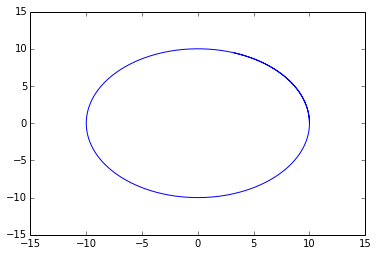

In [5]:
plot(x, y)

(5, 15)

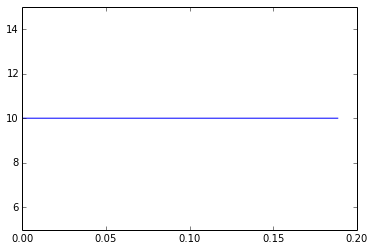

In [6]:
plot(t / np.sqrt(G*M) / Gyr, np.sqrt(x**2+y**2))
plt.ylim(5, 15)